In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.cm as cm

In [235]:
#import csv
df = pd.read_csv('/Users/hartnell/Documents/GitHub/Project-1/Crime_Data_from_2020_to_Present.csv')
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004842,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
1004843,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
1004844,240410786,10/14/2024 12:00:00 AM,10/11/2024 12:00:00 AM,2330,4,Hollenbeck,421,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,1700 ALBION ST,NaN,34.0675,-118.2240
1004845,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004847 non-null  int64  
 1   Date Rptd       1004847 non-null  object 
 2   DATE OCC        1004847 non-null  object 
 3   TIME OCC        1004847 non-null  int64  
 4   AREA            1004847 non-null  int64  
 5   AREA NAME       1004847 non-null  object 
 6   Rpt Dist No     1004847 non-null  int64  
 7   Part 1-2        1004847 non-null  int64  
 8   Crm Cd          1004847 non-null  int64  
 9   Crm Cd Desc     1004847 non-null  object 
 10  Mocodes         853256 non-null   object 
 11  Vict Age        1004847 non-null  int64  
 12  Vict Sex        860243 non-null   object 
 13  Vict Descent    860231 non-null   object 
 14  Premis Cd       1004831 non-null  float64
 15  Premis Desc     1004259 non-null  object 
 16  Weapon Used Cd  327193 non-null   fl

In [237]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004831e+06,327193.000000,1.004836e+06,69130.000000,2315.000000,64.00000,1.004847e+06,1.004847e+06
mean,2.202171e+08,1.339911e+03,1.069147e+01,1.115607e+03,1.400307e+00,5.001353e+02,2.891905e+01,3.056073e+02,363.944543,4.998958e+02,958.115941,984.022030,991.21875,3.399820e+01,-1.180908e+02
std,1.318835e+07,6.510691e+02,6.110286e+00,6.111622e+02,4.899607e-01,2.052622e+02,2.199224e+01,2.192915e+02,123.741225,2.050627e+02,110.359911,52.340476,27.06985,1.610827e+00,5.582785e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106168e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209158e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311101e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521040e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [238]:
df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151591
Vict Age                0
Vict Sex           144604
Vict Descent       144616
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677654
Weapon Desc        677654
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935717
Crm Cd 3          1002532
Crm Cd 4          1004783
LOCATION                0
Cross Street       850626
LAT                     0
LON                     0
dtype: int64

In [239]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [240]:
# Dropped unneccessary columns
df_dropped = df.drop([ "Rpt Dist No","Mocodes", "Status", "Status Desc", "Crm Cd 1", "Premis Cd",
 "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "LOCATION", "Cross Street"], axis=1)

In [241]:
df_dropped

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,O,STREET,NaN,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,1,510,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004842,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,1,510,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,NaN,34.0362,-118.3284
1004843,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,X,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,34.0685,-118.2460
1004844,240410786,10/14/2024 12:00:00 AM,10/11/2024 12:00:00 AM,2330,4,Hollenbeck,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",29,M,B,RESTAURANT/FAST FOOD,NaN,NaN,34.0675,-118.2240
1004845,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,308.0,STICK,34.0215,-118.2868


In [242]:
df_dropped.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LAT',
       'LON'],
      dtype='object')

In [172]:
updated_df.isnull().sum()

Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA                 0
AREA NAME            0
Rpt Dist No          0
Part 1-2             0
Crm Cd               0
Crm Cd Desc          0
Vict Age             0
Vict Sex             0
Vict Descent         0
Premis Desc        588
Weapon Used Cd       0
Weapon Desc          0
Year                 0
Month                0
year                 0
Crime Category       0
Weapon Category      0
dtype: int64

In [244]:
df_dropped.columns = df_dropped.columns.str.strip()

df_dropped['DATE OCC'] = pd.to_datetime(df_dropped['DATE OCC'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

df_dropped['Year'] = df_dropped['DATE OCC'].dt.year

df_dropped


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,LAT,LON,Year
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,O,STREET,NaN,NaN,34.0375,-118.3506,2020
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,34.0444,-118.2628,2020
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,34.0210,-118.3002,2020
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,NaN,34.1576,-118.4387,2020
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,630,4,Hollenbeck,1,510,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,NaN,34.0820,-118.2130,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004842,240710284,07/24/2024 12:00:00 AM,2024-07-23,1400,7,Wilshire,1,510,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,NaN,34.0362,-118.3284,2024
1004843,240104953,01/15/2024 12:00:00 AM,2024-01-15,100,1,Central,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,X,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,34.0685,-118.2460,2024
1004844,240410786,10/14/2024 12:00:00 AM,2024-10-11,2330,4,Hollenbeck,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",29,M,B,RESTAURANT/FAST FOOD,NaN,NaN,34.0675,-118.2240,2024
1004845,240309674,04/24/2024 12:00:00 AM,2024-04-24,1500,3,Southwest,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,308.0,STICK,34.0215,-118.2868,2024


In [245]:
# Sort by the occurred day of the crime
updated_df = df_dropped.sort_values(by =['DATE OCC'], ascending = True)

In [246]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004847 entries, 180892 to 908195
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1004847 non-null  int64         
 1   Date Rptd       1004847 non-null  object        
 2   DATE OCC        1004847 non-null  datetime64[ns]
 3   TIME OCC        1004847 non-null  int64         
 4   AREA            1004847 non-null  int64         
 5   AREA NAME       1004847 non-null  object        
 6   Part 1-2        1004847 non-null  int64         
 7   Crm Cd          1004847 non-null  int64         
 8   Crm Cd Desc     1004847 non-null  object        
 9   Vict Age        1004847 non-null  int64         
 10  Vict Sex        860243 non-null   object        
 11  Vict Descent    860231 non-null   object        
 12  Premis Desc     1004259 non-null  object        
 13  Weapon Used Cd  327193 non-null   float64       
 14  Weapon Desc     327

In [247]:
# Replace Vict Sex types H, X and - to Not specific
updated_df['Vict Sex']= updated_df['Vict Sex'].replace(['H', 'X', '-'], np.nan)
updated_df['Vict Sex']= updated_df['Vict Sex'].fillna('Not Specific')


In [248]:
# Summarise the ethnicity groups for better readability
# Asian: {"A", "C", "D", "F", "J", "K", "L", "V", "Z"}
# American: {"G", "H", "P", "S", "U"}
# Black: {"B", "I"}
# White: {"W"}
# Not Specific: {"O", "X",'-',NaN}

updated_df['Vict Descent']= updated_df['Vict Descent'].replace(["A", "C", "D", "F", "J", "K", "L", "V", "Z"], 'Asian')
updated_df['Vict Descent']= updated_df['Vict Descent'].replace(["G", "H", "P", "S", "U"], 'American')
updated_df['Vict Descent']= updated_df['Vict Descent'].replace(["B", "I"], 'Black')
updated_df['Vict Descent']= updated_df['Vict Descent'].replace(["W"], 'White')
updated_df['Vict Descent']= updated_df['Vict Descent'].replace(["O", "X",'-'], 'Not Specific')
updated_df['Vict Descent']= updated_df['Vict Descent'].fillna('Not Specific')
updated_df['Vict Descent']

180892           White
118019           White
190822    Not Specific
118076           Black
145445    Not Specific
              ...     
942083           White
959531    Not Specific
947604    Not Specific
922388           White
908195        American
Name: Vict Descent, Length: 1004847, dtype: object

In [249]:
updated_df['Vict Descent']

180892           White
118019           White
190822    Not Specific
118076           Black
145445    Not Specific
              ...     
942083           White
959531    Not Specific
947604    Not Specific
922388           White
908195        American
Name: Vict Descent, Length: 1004847, dtype: object

In [250]:
updated_df['Weapon Used Cd'] = updated_df['Weapon Used Cd'].fillna('None')
updated_df['Weapon Desc'] = updated_df['Weapon Desc'].fillna('None')

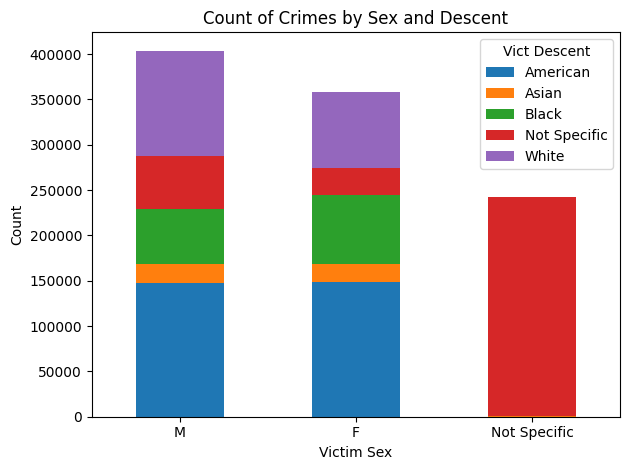

In [251]:
grouped_data = updated_df.groupby(['Vict Sex', 'Vict Descent']).size().unstack(fill_value=0)
order_for_count_of_crimes_by_sex_and_descent = ['M','F', 'Not Specific']
grouped_data = grouped_data.reindex(order_for_count_of_crimes_by_sex_and_descent)

grouped_data.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.title('Count of Crimes by Sex and Descent')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()



In [252]:
#count the number of part 1 and the number of part 2 crimes
updated_df['Part 1-2'].value_counts()

Part 1-2
1    602600
2    402247
Name: count, dtype: int64

In [253]:
updated_df['Year'] = updated_df['DATE OCC'].dt.year
updated_df['Month'] = updated_df['DATE OCC'].dt.month
updated_df['Year'] = updated_df['Year'].astype(int)
updated_df['Month'] = updated_df['Month'].astype(int)

In [270]:
#Count the number of crimes by year
updated_df.Year.value_counts().sort_index()

Year
2020    199846
2021    209871
2022    235252
2023    232353
2024    127525
Name: count, dtype: int64

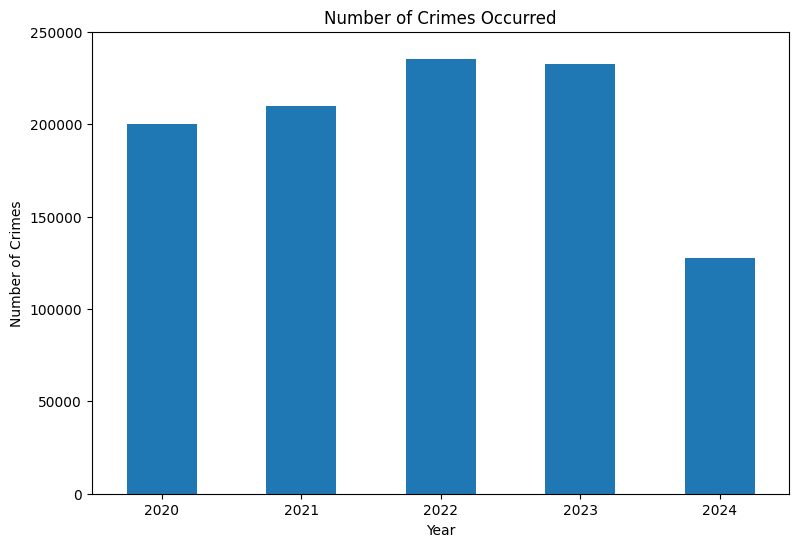

In [280]:
year_counts = updated_df.Year.value_counts().sort_index()

year_counts.plot(kind='bar', figsize=(9, 6))
plt.title('Number of Crimes Occurred')
plt.xlabel('Year')
plt.xticks(rotation= 0)
plt.ylabel('Number of Crimes')
plt.ylim(0, 250000)
plt.show()

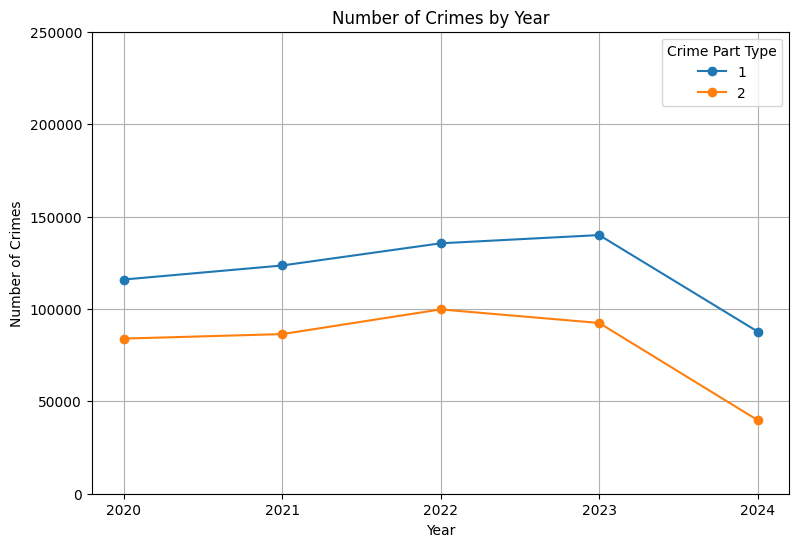

In [256]:
crime_part_counts = updated_df.pivot_table(index='Year', columns='Part 1-2', aggfunc='size')

crime_part_counts.plot(kind='line', marker='o' ,figsize=(9, 6))
plt.title('Number of Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(int(updated_df.Year.min()), int(updated_df.Year.max()) + 1))
plt.ylim(0, 250000)
plt.grid()
plt.legend(title='Crime Part Type')
plt.show()

Text(0, 0.5, 'Victim Age')

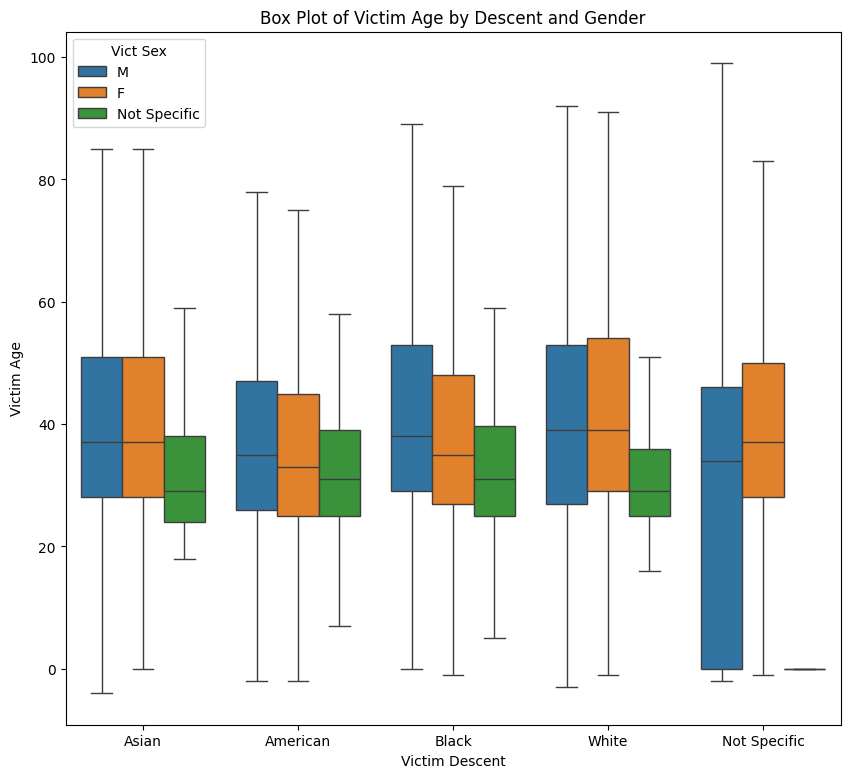

In [257]:
#boxplot of Vict Age by Vict Sex & Vict Descent
plt.figure(figsize=(10, 9)) 
order = ['Asian','American', 'Black', 'White', 'Not Specific']
sns.boxplot(data = updated_df,x="Vict Descent",y="Vict Age", hue="Vict Sex",order=order,showfliers=False)
plt.title('Box Plot of Victim Age by Descent and Gender')
plt.xlabel('Victim Descent')
plt.ylabel('Victim Age')


Text(0, 0.5, 'Victim Age')

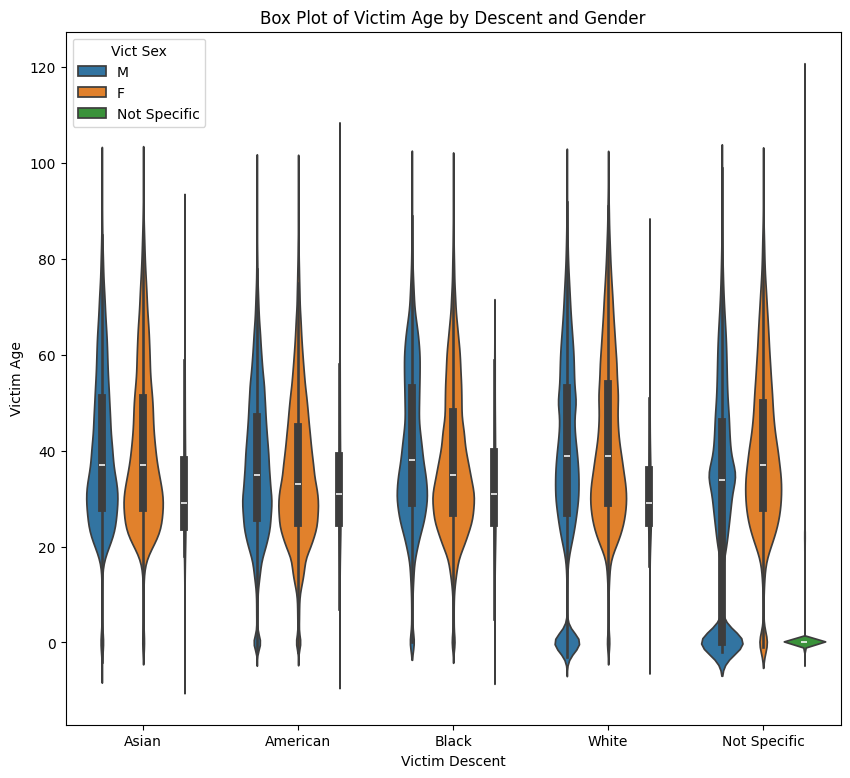

In [258]:
#boxplot of Vict Age by Vict Sex & Vict Descent
plt.figure(figsize=(10, 9)) 
order = ['Asian','American', 'Black', 'White', 'Not Specific']
sns.violinplot(data = updated_df,x="Vict Descent",y="Vict Age", hue="Vict Sex",order=order)
plt.title('Box Plot of Victim Age by Descent and Gender')
plt.xlabel('Victim Descent')
plt.ylabel('Victim Age')


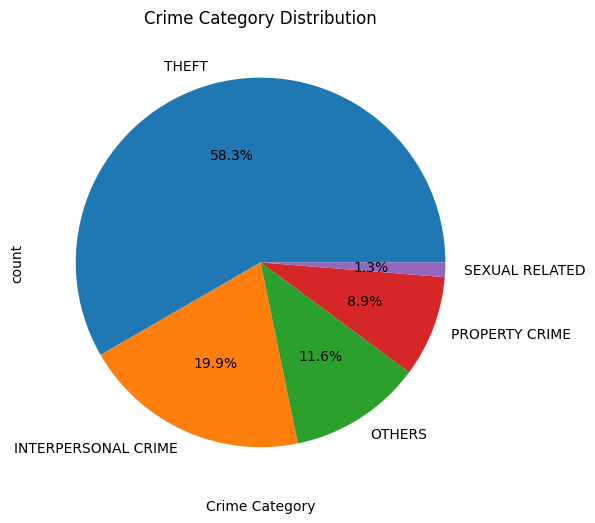

In [107]:
# Define the categorization function
def categorize_crime(crime_desc):
    if any(keyword in crime_desc for keyword in ['STOLEN', 'THEFT', 'ROBBERY', 'BURGLARY', 'SNATCH','PICKPOCKET','STEAL']):
        return 'THEFT'
    elif any(keyword in crime_desc for keyword in ['CHILD', 'PARTNER', 'ASSAULT']):
        return 'INTERPERSONAL CRIME'
    elif any(keyword in crime_desc for keyword in ['VANDALISM', 'ARSON']):
        return 'PROPERTY CRIME'
    elif any(keyword in crime_desc for keyword in ['RAPE', 'PIMP', 'SEX','PORN']):
        return 'SEXUAL RELATED'
    else:
        return 'OTHERS'

# Apply the function to categorize crimes
updated_df['Crime Category'] = updated_df['Crm Cd Desc'].apply(categorize_crime)

# Optionally, you can visualize the results (e.g., count of each category)
crime_counts = df['Crime Category'].value_counts()
crime_counts.plot(kind='pie',autopct='%1.1f%%',figsize=(9, 6))
plt.title('Crime Category Distribution')
plt.xlabel('Crime Category')
plt.show()

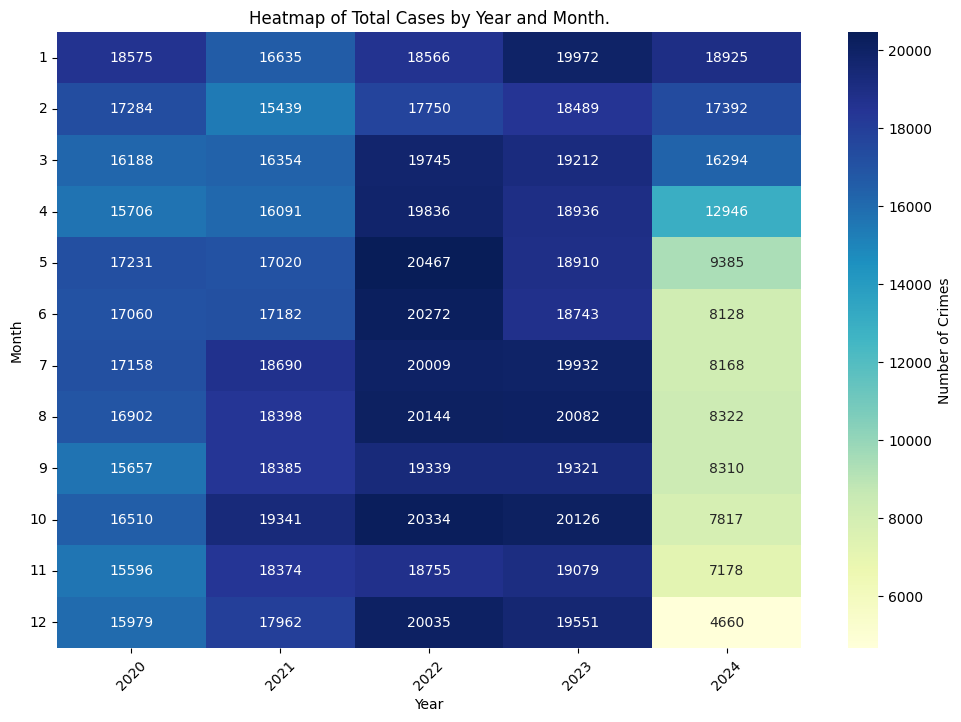

In [ ]:
# Calculate the number of cases for each year and month.
monthly_counts = updated_df.groupby(['Year', 'Month']).size().reset_index(name='case_count')

# Use pivot_table to create a pivot table.
heatmap_data = monthly_counts.pivot_table(index='Month', columns='Year', values='case_count', fill_value=0)

# Plot the heatmap.
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Number of Crimes'})
plt.title('Heatmap of Total Cases by Year and Month.')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(rotation=45)  # Rotate the x-axis labels.
plt.yticks(rotation=0)   # Ensure the y-axis labels are displayed horizontally.
plt.show()

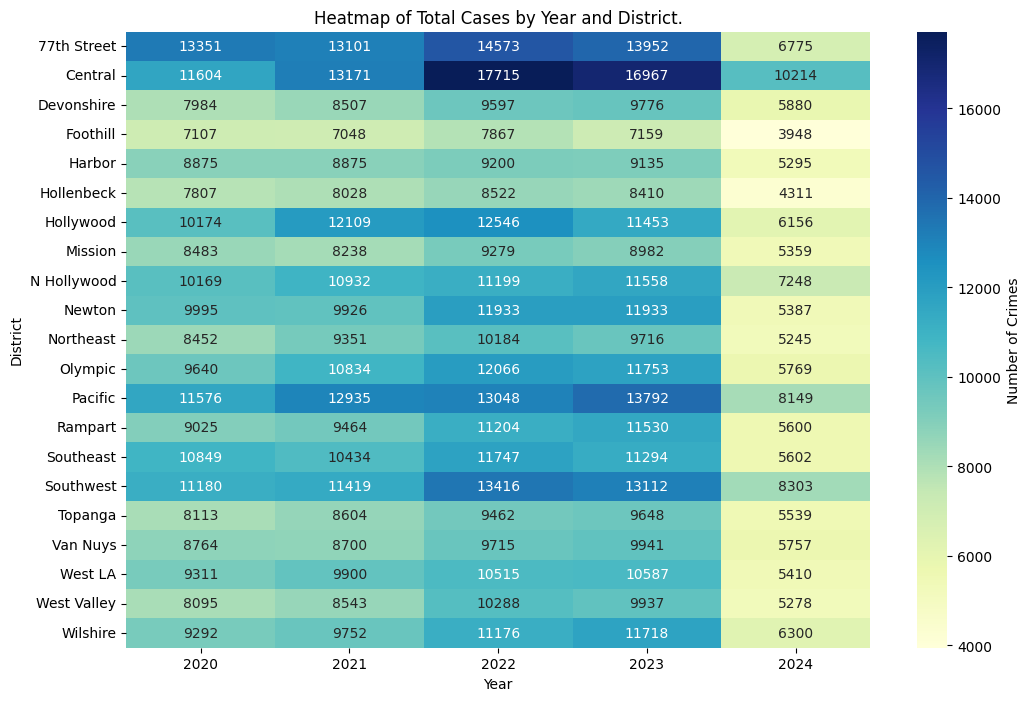

In [ ]:
monthly_counts_for_district = updated_df.groupby(['Year', 'AREA NAME']).size().reset_index(name='case_count')
heatmap_data_for_district = monthly_counts_for_district.pivot_table(index='AREA NAME', columns='Year', values='case_count', fill_value=0)

# Plot the heatmap.
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_for_district, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Number of Crimes'})
plt.title('Heatmap of Total Cases by Year and District.')
plt.xlabel('Year')
plt.ylabel('District') # Rotate the x-axis labels.
plt.yticks(rotation=0)   # Ensure the y-axis labels are displayed horizontally.
plt.show()

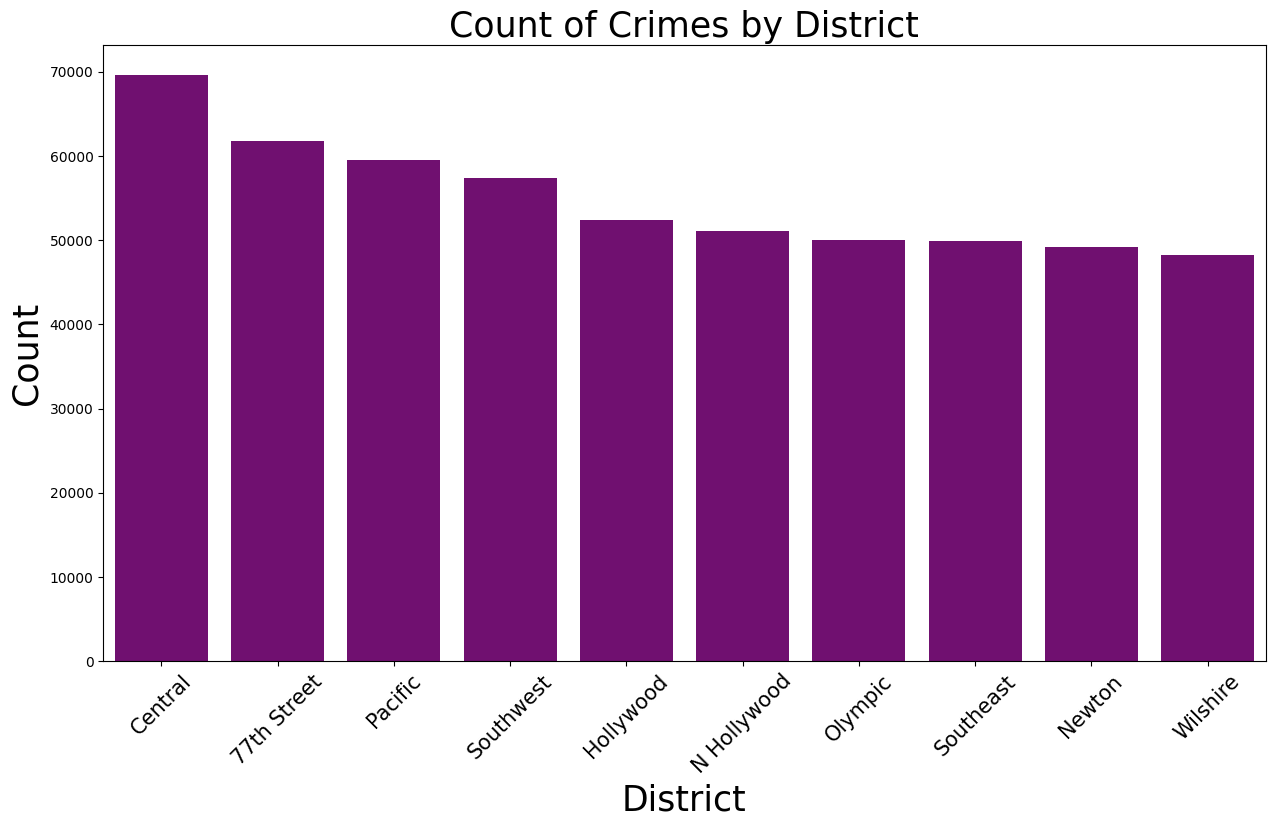

In [176]:
#count of crime

plt.figure(figsize=(15,8))
highest_district = updated_df['AREA NAME'].value_counts().index[:10]
sns.countplot(x="AREA NAME", data=updated_df, order=highest_district, color='purple')

plt.title('Count of Crimes by District', fontsize=25)
plt.xlabel('District', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.show()

/var/folders/6j/214cbzs14zjbmr7qh9n3m4jr0000gn/T/ipykernel_5894/874658244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Weapon Desc', data = updated_df, order = weapon_barchart, palette = 'viridis')


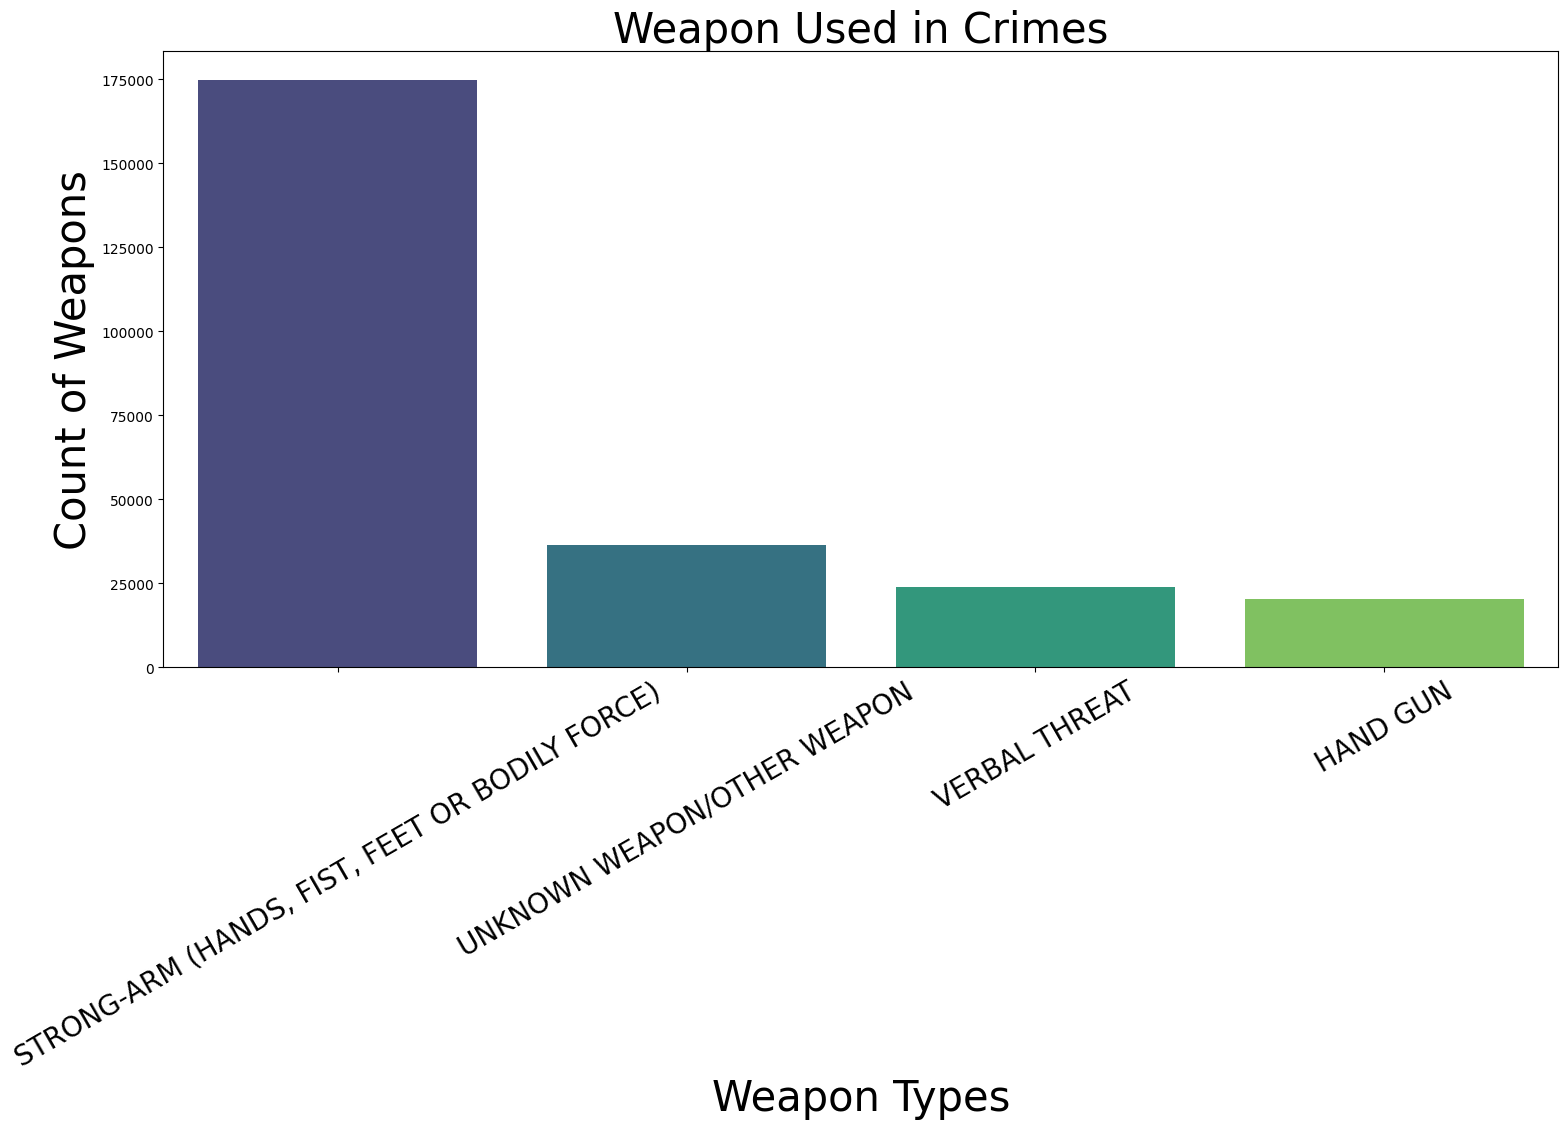

In [179]:
weapon_barchart = updated_df['Weapon Desc'].value_counts().index[1:5]
plt.figure(figsize=(18,8))
sns.countplot(x = 'Weapon Desc', data = updated_df, order = weapon_barchart, palette = 'viridis')
plt.title('Weapon Used in Crimes', fontsize=30)
plt.xlabel('Weapon Types', fontsize=30)
plt.ylabel('Count of Weapons', fontsize=30)
plt.xticks(rotation=30, fontsize=20)
plt.show()